In [1]:
import os
import warnings
import time
import threading
import seaborn as sns
from sklearn.metrics import mean_squared_error
from source.jabba import JABBA
from source.jabba import QABBA
from fABBA import fABBA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from source.ABBA import ABBA
from source.jabba.storage import compute_storage1, compute_storage2
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('bmh')
np.random.seed(42)

In [2]:
num = 100000
mu, sigma = 0, 1
tol, alpha = 0.01, 0.05

synthetic_ts = np.float64(np.float32(np.random.normal(mu, sigma, num)))
#synthetic_ts = (synthetic_ts - synthetic_ts.mean()) / synthetic_ts.std()
#plt.figure(figsize=(22,5))
#plt.plot(synthetic_ts[:100])
#plt.show()
storage_fABBA = 0
storage_ABBA = 0

storage_QABBA1 = []
storage_QABBA2 = []

In [3]:
# time.sleep(5)
partition_num = threading.active_count()
print("Available threads:", partition_num)

Available threads: 8


In [4]:
start = time.time()
fabba = fABBA(tol=tol, alpha=alpha, sorting='norm', scl=1, verbose=0, return_list=True) 
symbols_fabba = fabba.fit_transform(synthetic_ts)
reconstruction_fabba = fabba.inverse_transform(symbols_fabba, synthetic_ts[0])
fabba.parameters.centers = np.float32(fabba.parameters.centers)
end = time.time()
time_cost_fabba = end - start
storage_fABBA = compute_storage1(fabba.parameters.centers, len(symbols_fabba), 
                                 num_init=1, bits_for_len=32, bits_for_inc=32, bits_for_ts=32)

compression_rate_fabba = 1 - fabba.parameters.centers.shape[0]/len(synthetic_ts)
num_symbols_fabba = len(np.unique(symbols_fabba))
error_fABBA = mean_squared_error(synthetic_ts, reconstruction_fabba)
print("time:", time_cost_fabba)
print("the number of symbols used:", num_symbols_fabba)
print("k/n:", 1 - compression_rate_fabba)
print("Compression ratio:", storage_fABBA / (num*32))
print("MSE:", error_fABBA)

time: 19.746842861175537
the number of symbols used: 358
k/n: 0.0035800000000000276
Compression ratio: 0.241355
MSE: 7.497353070845967


In [5]:
time.sleep(5)
start = time.time()
abba = ABBA(tol=tol, scl=1, min_k=num_symbols_fabba, max_k=num_symbols_fabba, norm=2)
symbols_abba, centers = abba.transform(synthetic_ts)
reconstruction_abba = abba.inverse_transform(symbols_abba, np.float32(centers), synthetic_ts[0])
end = time.time()
time_cost_abba = end - start
storage_ABBA = compute_storage1(centers, len(symbols_abba), 
                                 num_init=1, bits_for_len=32, bits_for_inc=32, bits_for_ts=32)
compression_rate_abba = 1 - centers.shape[0]/len(synthetic_ts)
error_ABBA = mean_squared_error(synthetic_ts, reconstruction_abba)
num_symbols_fabba = num_symbols_fabba 
print("time:", time_cost_abba)
print("the number of symbols used:", num_symbols_fabba)
print("k/n:", 1 - compression_rate_abba)
print("Compression ratio:", storage_ABBA / (num*32))
print("MSE:", error_ABBA)

Digitization: Using 358 symbols
time: 88.64312839508057
the number of symbols used: 358
k/n: 0.0035800000000000276
Compression ratio: 0.241355
MSE: 4.263935225346596


--- Partition: 1
Runtime: 19.6691837310791
The number of symbols used: 358
MSE: 20.87371187584918
Compression ratio: 0.2364525
Runtime: 71.41939878463745
The number of symbols used: 358
MSE: 8.078376068017135
Compression ratio: 0.2364525


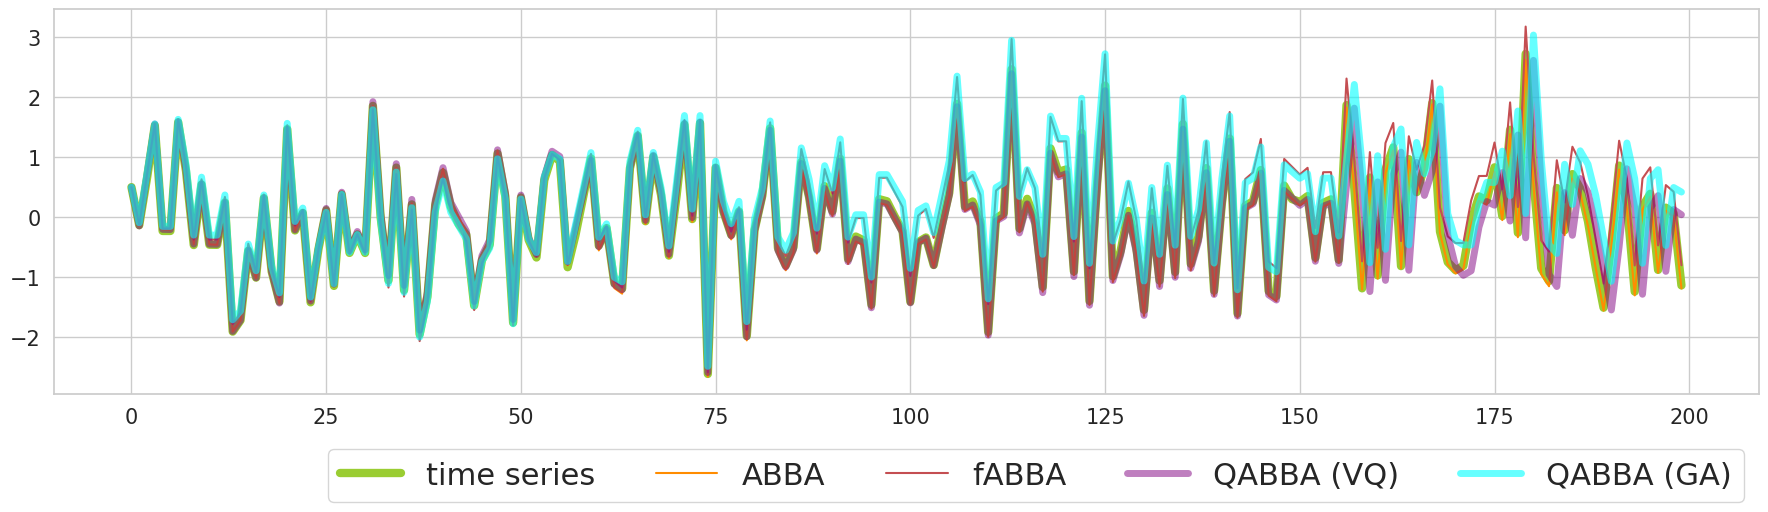

--- Partition: 2
Runtime: 9.507036924362183
The number of symbols used: 358
MSE: 11.211907050097789
Compression ratio: 0.23646
Runtime: 61.994380950927734
The number of symbols used: 358
MSE: 2.681681802325054
Compression ratio: 0.23646


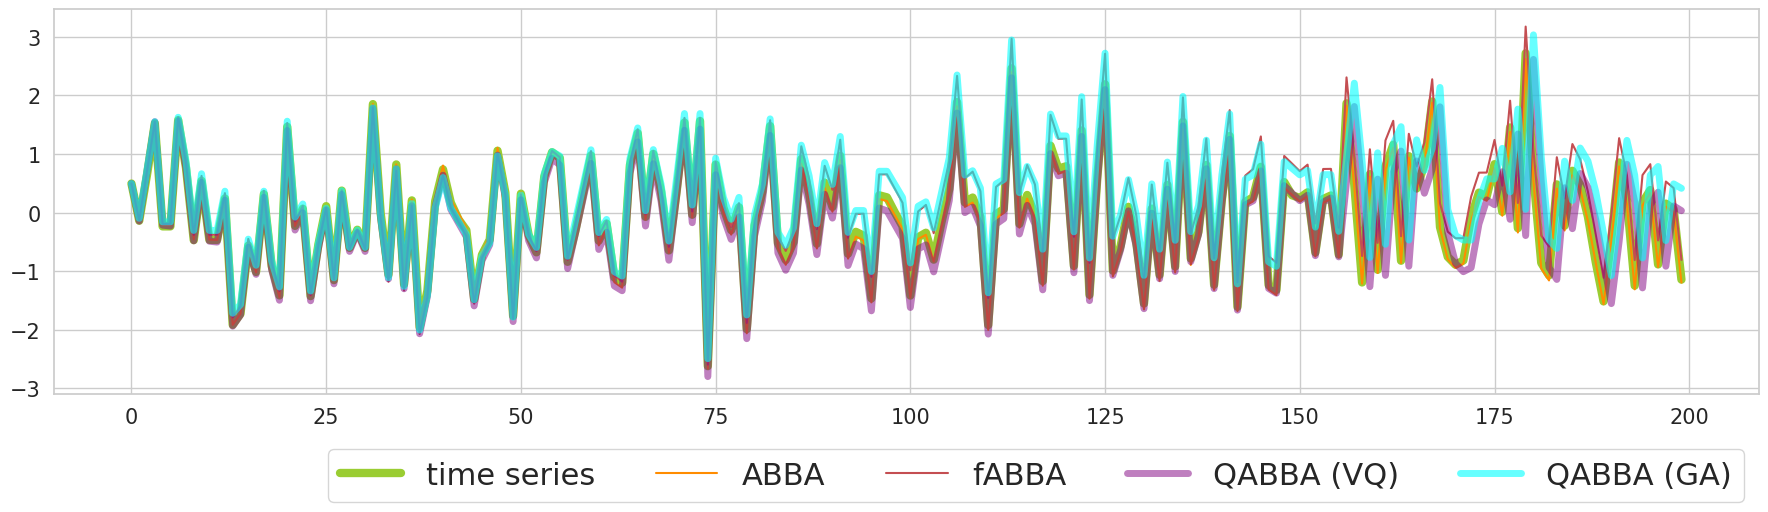

--- Partition: 3
Runtime: 6.434682369232178
The number of symbols used: 358
MSE: 16.89750330927016
Compression ratio: 0.236465
Runtime: 58.74926018714905
The number of symbols used: 358
MSE: 11.307062227350421
Compression ratio: 0.236465


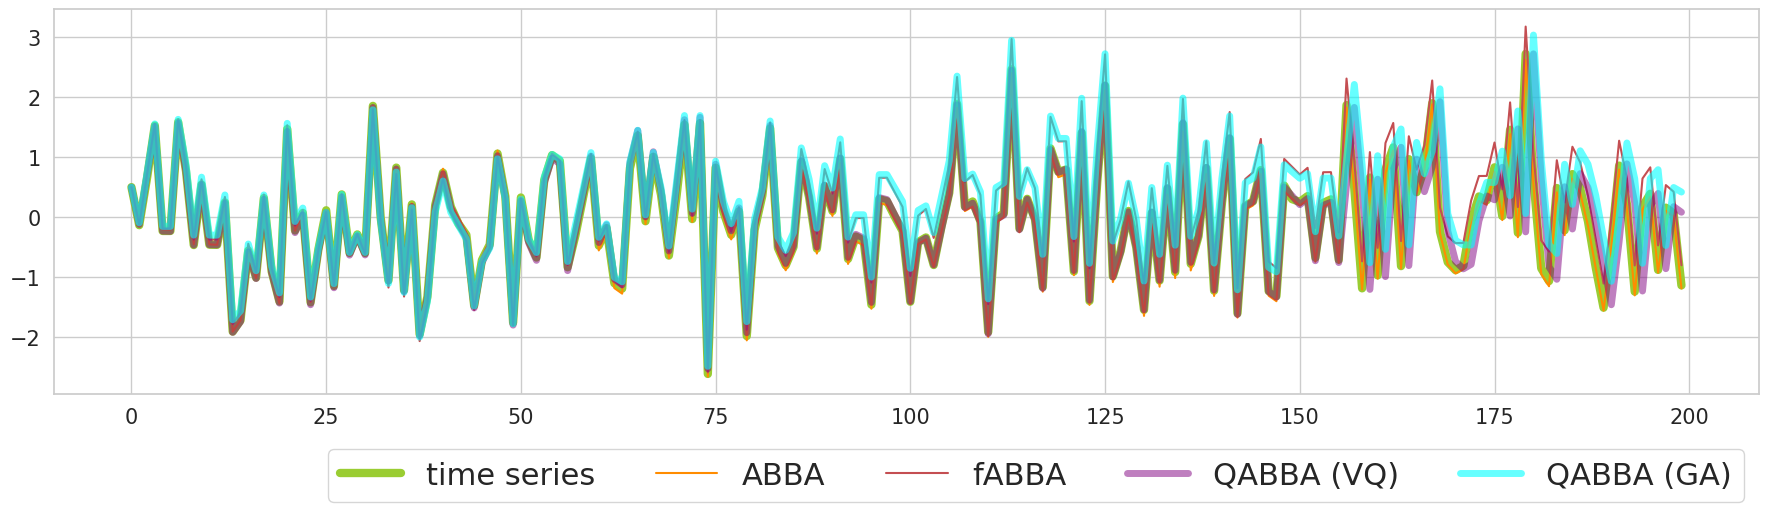

--- Partition: 4
Runtime: 5.495404958724976
The number of symbols used: 358
MSE: 10.73393495855728
Compression ratio: 0.236475
Runtime: 55.753220081329346
The number of symbols used: 358
MSE: 5.229010521568657
Compression ratio: 0.236475


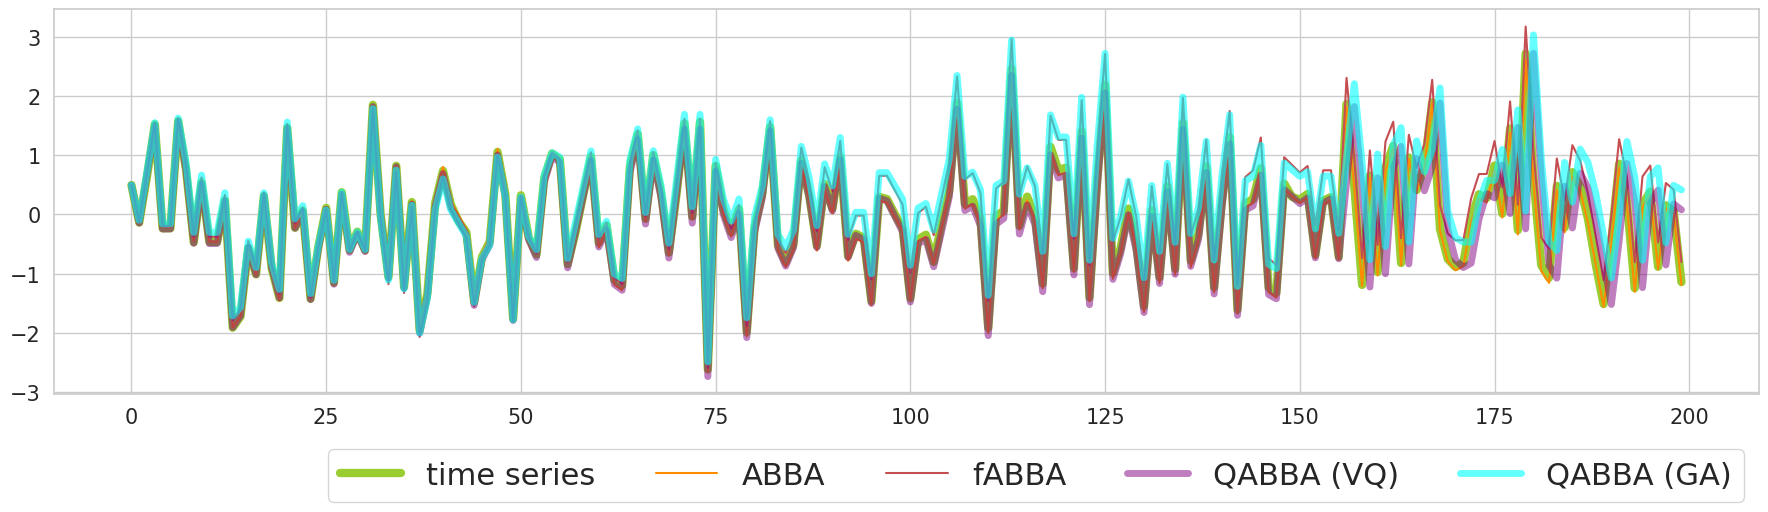

--- Partition: 5
Runtime: 4.633194208145142
The number of symbols used: 358
MSE: 7.945055330229667
Compression ratio: 0.2364825
Runtime: 57.4537136554718
The number of symbols used: 358
MSE: 2.76121540696983
Compression ratio: 0.2364825


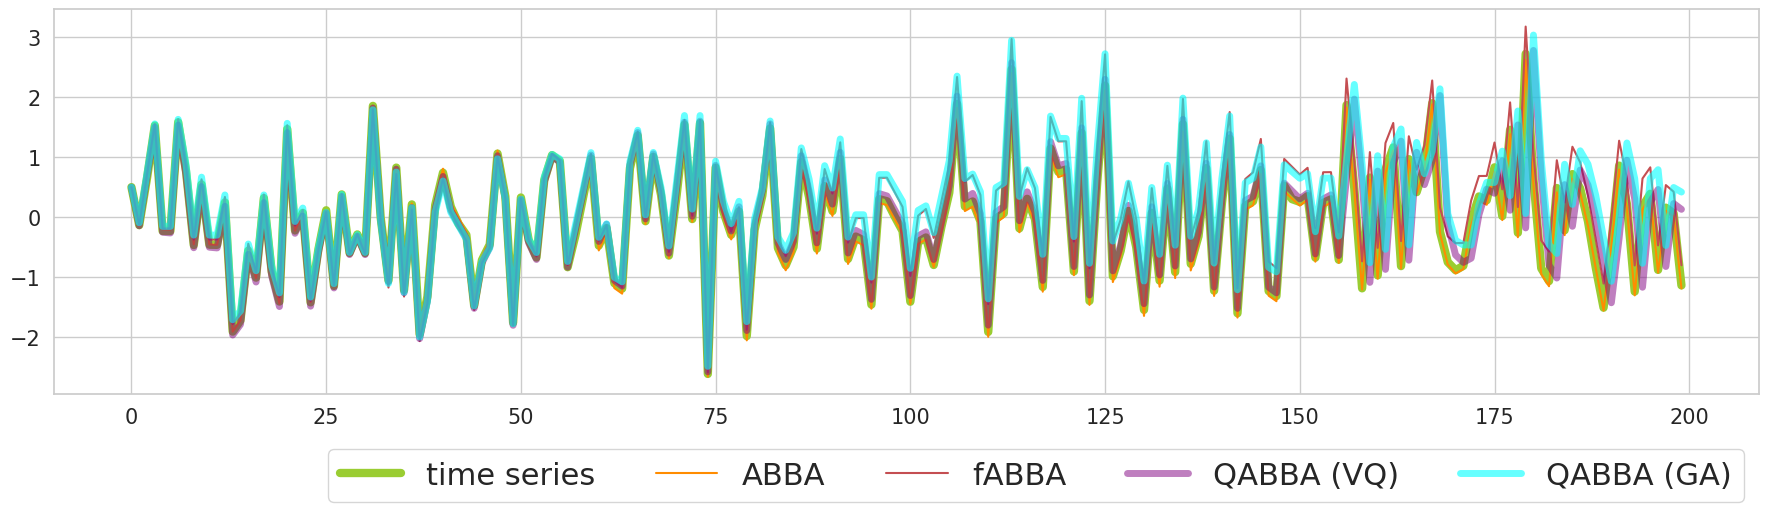

--- Partition: 6
Runtime: 4.118056058883667
The number of symbols used: 358
MSE: 8.897138338549299
Compression ratio: 0.23648
Runtime: 55.429211378097534
The number of symbols used: 358
MSE: 2.788506318543923
Compression ratio: 0.23648


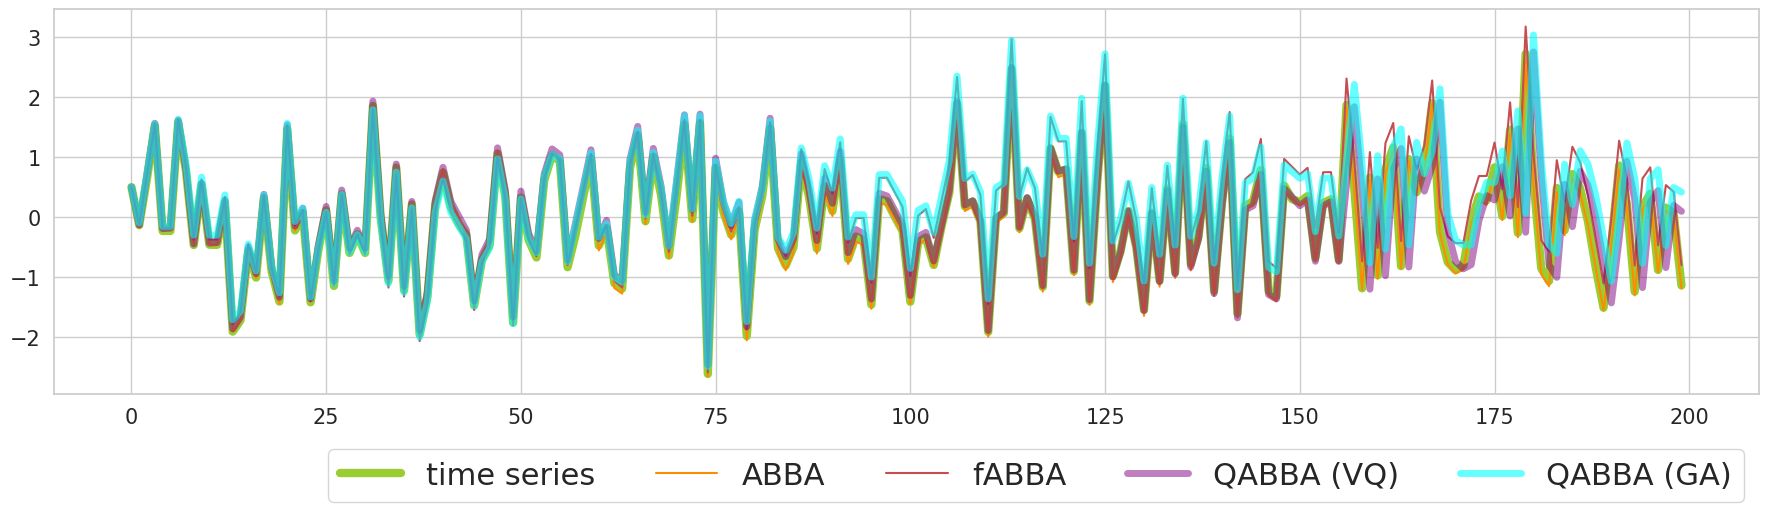

--- Partition: 7
Runtime: 4.198611497879028
The number of symbols used: 358
MSE: 7.381804632384894
Compression ratio: 0.236485
Runtime: 55.132044315338135
The number of symbols used: 358
MSE: 3.6018336036251033
Compression ratio: 0.236485


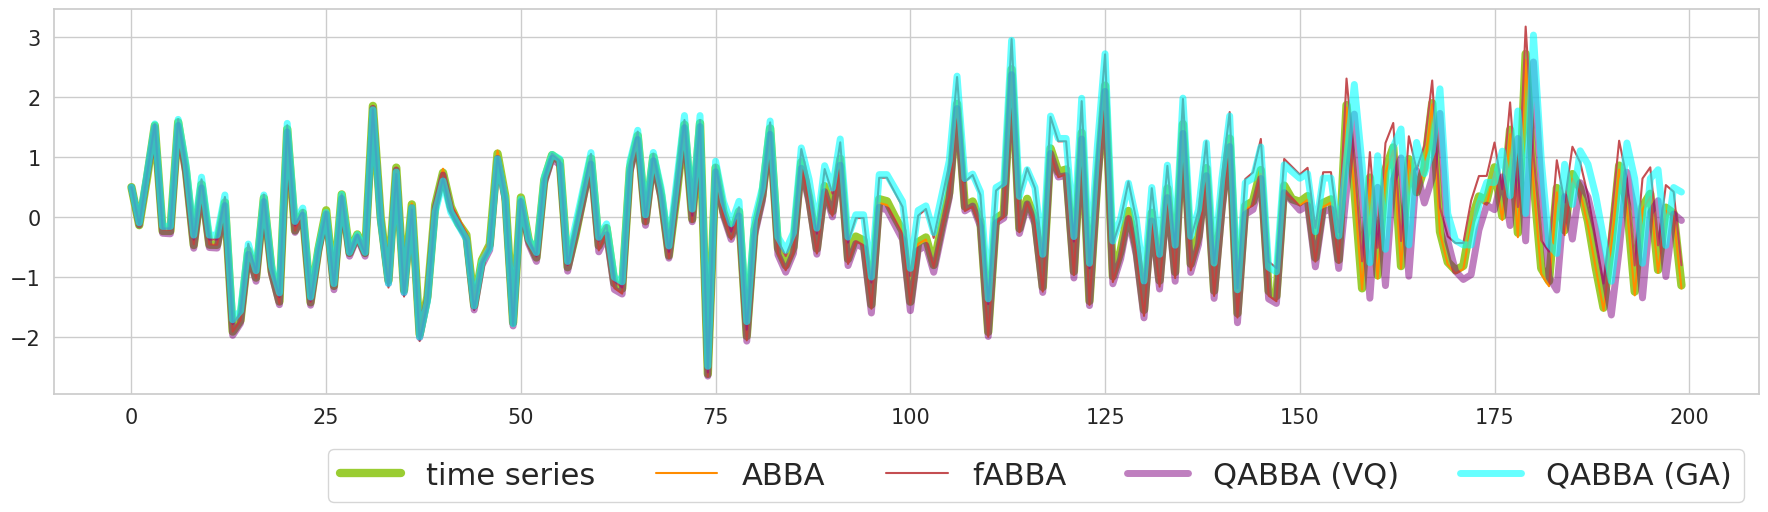

--- Partition: 8
Runtime: 3.7562754154205322
The number of symbols used: 358
MSE: 6.687841087124162
Compression ratio: 0.236505
Runtime: 54.85372519493103
The number of symbols used: 358
MSE: 3.203686493203757
Compression ratio: 0.236505


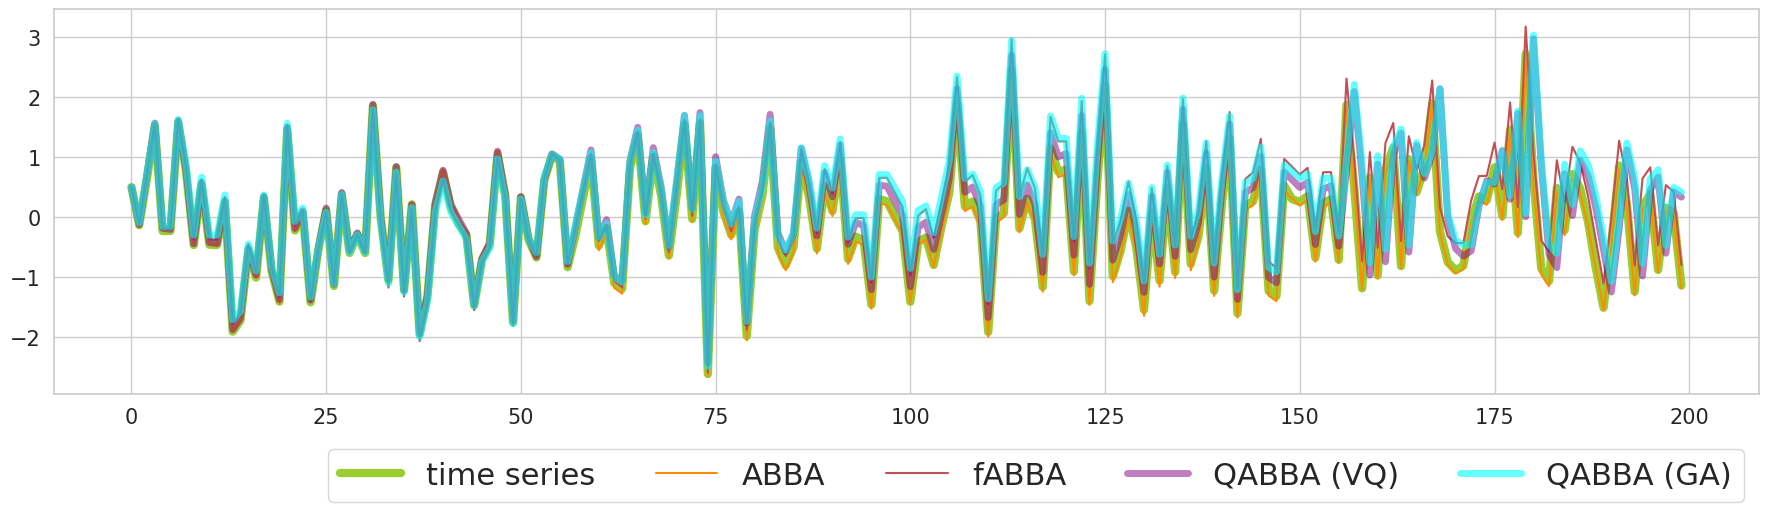

In [6]:
reconstruction_pabba1_list = list()
time_cost_pabba1_list = list()
compression_rate_pabba1_list = list()
num_symbols_pabba1_list = list()
mse_pabba1_list = list()

reconstruction_pabba2_list = list()
time_cost_pabba2_list = list()
compression_rate_pabba2_list = list()
num_symbols_pabba2_list = list()
mse_pabba2_list = list()

for i in range(1, partition_num + 1):
    print("--- Partition:", i)
    
    start = time.time()
    pabba = QABBA(tol=tol, alpha=alpha, init="agg", bits_for_len=8, bits_for_inc=12, auto_digitize=False, partition=i, verbose=0)
    symbols_pabba = pabba.fit_transform(synthetic_ts, n_jobs=i)
    reconstruction_pabba1 = pabba.inverse_transform(symbols_pabba, n_jobs=i)
    end = time.time()
    time_cost = end - start
    compression_rate = 1 - pabba.parameters.centers.shape[0]/len(synthetic_ts)
    num_symbols = len(np.unique(np.hstack(symbols_pabba)))
    minlen = min(len(reconstruction_pabba1), len(synthetic_ts))
    error_pabba = mean_squared_error(synthetic_ts[:minlen], reconstruction_pabba1[:minlen])
    storage_QABBA1.append(compute_storage2(pabba.parameters.centers, sum([len(i) for i in symbols_pabba]), num_init=i, bits_for_len=8, bits_for_inc=12, bits_for_ts=32))

    print("Runtime:", time_cost)
    print("The number of symbols used:", num_symbols)
    print("MSE:", error_pabba)
    print("Compression ratio:", storage_QABBA1[-1]/ (num*32))
    
    reconstruction_pabba1_list.append(reconstruction_pabba1)
    time_cost_pabba1_list.append(time_cost)
    compression_rate_pabba1_list.append(compression_rate)
    num_symbols_pabba1_list.append(num_symbols)
    mse_pabba1_list.append(error_pabba)
    
    start = time.time()
    pabba = QABBA(tol=tol, k=num_symbols, init="kmeans", bits_for_len=8, bits_for_inc=12, partition=i, verbose=0)
    symbols_pabba = pabba.fit_transform(synthetic_ts, n_jobs=i)
    reconstruction_pabba2 = pabba.inverse_transform(symbols_pabba, n_jobs=i)
    end = time.time()
    time_cost = end - start
    compression_rate = 1 - pabba.parameters.centers.shape[0]/len(synthetic_ts)
    num_symbols = len(np.unique(np.hstack(symbols_pabba)))
    minlen = min(len(reconstruction_pabba2), len(synthetic_ts))
    error_pabba = mean_squared_error(synthetic_ts[:minlen], reconstruction_pabba2[:minlen])
    storage_QABBA2.append(compute_storage2(pabba.parameters.centers, sum([len(i) for i in symbols_pabba]), num_init=i, bits_for_len=8, bits_for_inc=12, bits_for_ts=32))

    print("Runtime:", time_cost)
    print("The number of symbols used:", num_symbols)
    print("MSE:", error_pabba)
    print("Compression ratio:", storage_QABBA2[-1]/ (num*32))
    
    reconstruction_pabba2_list.append(reconstruction_pabba2)
    time_cost_pabba2_list.append(time_cost)
    compression_rate_pabba2_list.append(compression_rate)
    num_symbols_pabba2_list.append(num_symbols)
    mse_pabba2_list.append(error_pabba)

    plt.style.use("bmh")
    plt.figure(figsize=(22,5))
    sns.set(font_scale=2, style="whitegrid")
    plt.rcParams['axes.facecolor'] = 'white'

    plt.plot(synthetic_ts[:200],c='yellowgreen', linewidth=6, label="time series")
    plt.plot(reconstruction_abba[:200],  c='darkorange', label="ABBA")
    plt.plot(reconstruction_fabba[:200], c='r', label="fABBA")
    plt.plot(reconstruction_pabba2[:200], c='purple', linewidth=5, alpha=0.5, label="QABBA (VQ)")
    plt.plot(reconstruction_pabba1[:200], c='cyan', linewidth=5, alpha=0.6, label="QABBA (GA)")
    plt.legend(ncols=5, loc='lower right', bbox_to_anchor=(0.5, -0.32, 0.5, 0.5))
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)

    plt.savefig('figs/partition_' + str(i) + '.pdf')
    plt.show()

In [7]:
records_pabba1 = np.vstack((np.vstack((np.vstack((np.vstack((time_cost_pabba1_list, compression_rate_pabba1_list)),
                                       num_symbols_pabba1_list)), mse_pabba1_list)), storage_QABBA1))

records_pabba2 = np.vstack((np.vstack((np.vstack((np.vstack((time_cost_pabba2_list, compression_rate_pabba2_list)),
                                       num_symbols_pabba2_list)), mse_pabba2_list)), storage_QABBA2))

records_abba = np.array([time_cost_abba, compression_rate_abba, num_symbols_fabba, error_ABBA, storage_fABBA]) 
records_fabba = np.array([time_cost_fabba, compression_rate_fabba, num_symbols_fabba, error_fABBA, storage_fABBA]) 

records = np.hstack((records_abba.reshape(-1,1), records_fabba.reshape(-1,1)))
records = np.hstack((records_pabba1, records))
records = np.hstack((records_pabba2, records))


In [8]:
partition_num
records = pd.DataFrame(records)
records.index = ["runtime", "compression rate", "symbols", "mse", "storage"]
col_names = list()

for i in range(1, partition_num  + 1):
    col_names.append("QABBA (VQ) partition="+str(i))
    
for i in range(partition_num  + 1, 2*partition_num  + 1):
    col_names.append("QABBA (GA) partition="+str(i-partition_num))

col_names.append("ABBA")
col_names.append("fABBA")
records.columns = col_names
display(records)
records.to_csv("results/partition_records1.csv", index=True)

,QABBA (VQ) partition=1,QABBA (VQ) partition=2,QABBA (VQ) partition=3,QABBA (VQ) partition=4,QABBA (VQ) partition=5,QABBA (VQ) partition=6,QABBA (VQ) partition=7,QABBA (VQ) partition=8,QABBA (GA) partition=1,QABBA (GA) partition=2,QABBA (GA) partition=3,QABBA (GA) partition=4,QABBA (GA) partition=5,QABBA (GA) partition=6,QABBA (GA) partition=7,QABBA (GA) partition=8,ABBA,fABBA
runtime,71.419399,61.994381,58.749260,55.753220,57.453714,55.429211,55.132044,54.853725,19.669184,9.507037,6.434682,5.495405,4.633194,4.118056,4.198611,3.756275,88.643128,19.746843
compression rate,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420
symbols,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mse,8.078376,2.681682,11.307062,5.229011,2.761215,2.788506,3.601834,3.203686,20.873712,11.211907,16.897503,10.733935,7.945055,8.897138,7.381805,6.687841,4.263935,7.497353
storage,756648.000000,756672.000000,756688.000000,756720.000000,756744.000000,756736.000000,756752.000000,756816.000000,756648.000000,756672.000000,756688.000000,756720.000000,756744.000000,756736.000000,756752.000000,756816.000000,772336.000000,772336.000000


In [9]:
# np.save("PABBA_param.npy", pabba.parameters) 
# Load PABBA parameters
# read_PABBA_param = np.load("PABBA_param.npy",allow_pickle='TRUE').item()